In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 15

In [3]:
from dsutils.eda import *
from dsutils.stats import *
from dsutils.ml import *

In [4]:
data = pd.read_csv('train_reduced.csv')

In [5]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


___
<center><b>abs_token_diff</b>: absolute difference between number of token in question1 and question2</center>


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  1.0   3.0   6.0   24.0  223  4.44  5.59
1        0    0.0  1.0   2.0   3.0   13.0  39   2.42  2.69
overall  0    0.0  1.0   2.0   5.0   21.0  223  3.69  4.83


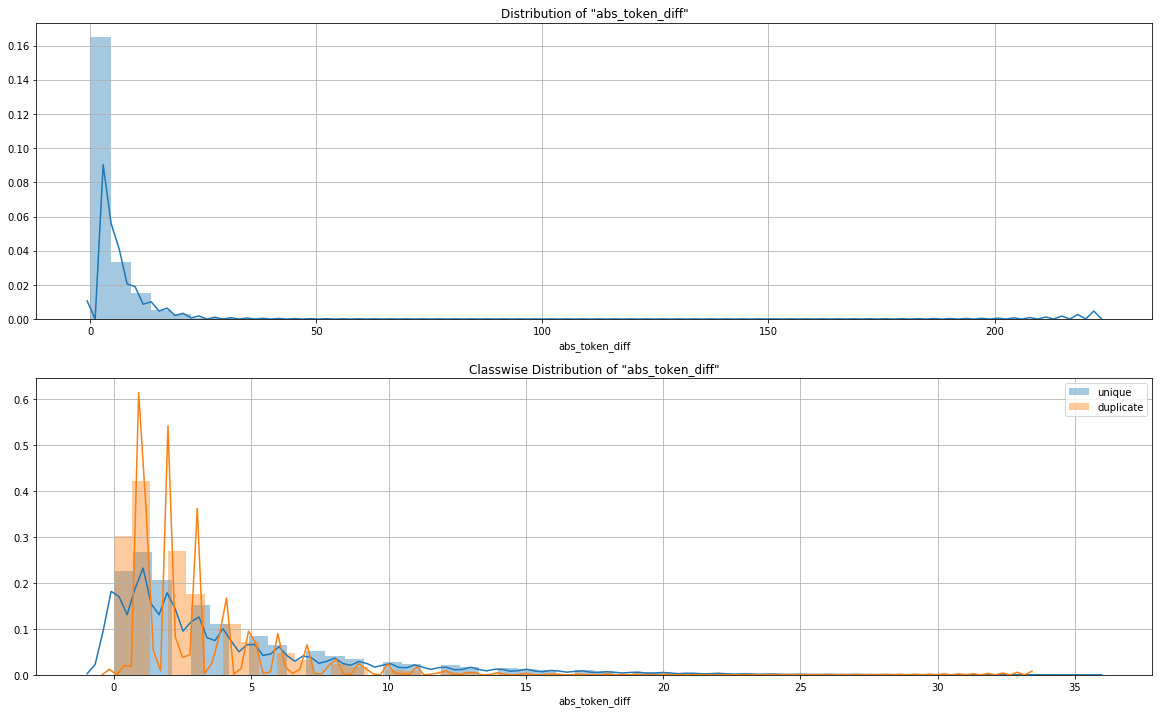

In [6]:
data['abs_token_diff'] = data[['question1', 'question2']].progress_apply(
    lambda row: abs(len(row['question1'].split())-len(row['question2'].split())),
    axis=1
)

print(feature_distribution(data, 'abs_token_diff', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'abs_token_diff', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=35)

___
<center><b>avg_num_token</b>: average number of tokens present in the questions</center>


         min  1st  25th  50th  75th  99th    max   mean   std
0        2.5  4.0  8.0   10.5  14.0  30.5  135.0  11.77  5.54
1        2.5  4.0  7.5   9.0   11.5  22.5  62.0   9.85   3.75
overall  2.5  4.0  8.0   10.0  13.0  28.0  135.0  11.06  5.04


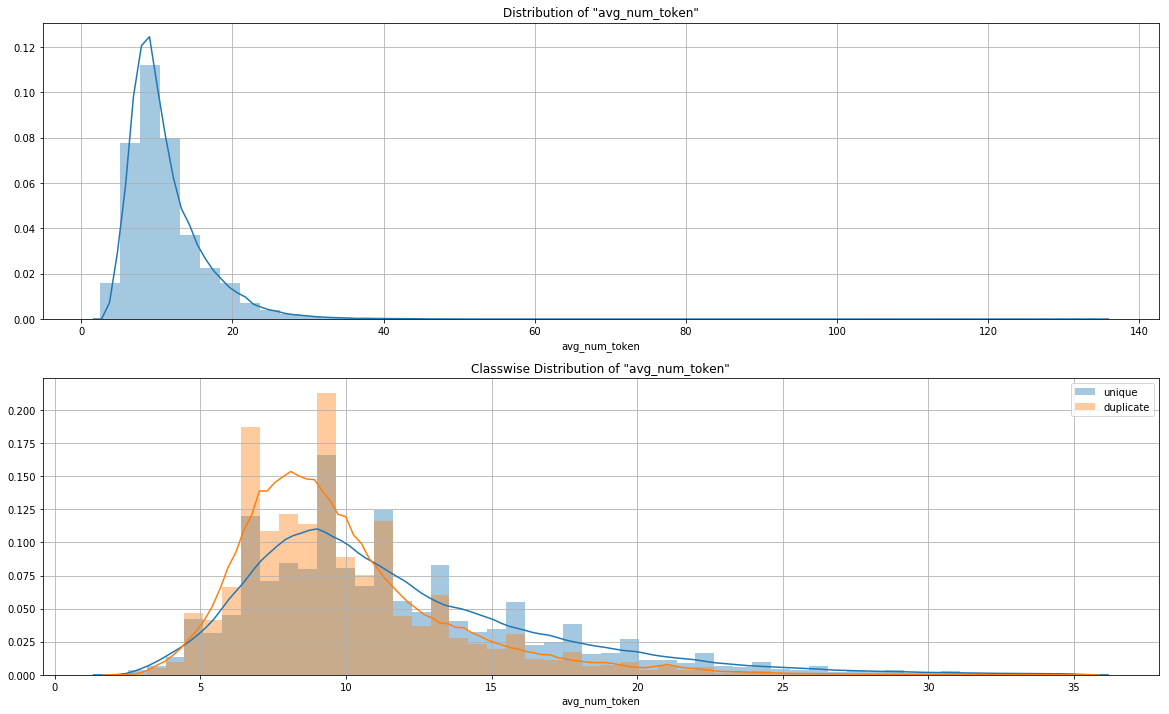

In [7]:
data['avg_num_token'] = data[['question1', 'question2']].progress_apply(
    lambda row: (len(row['question1'].split())+len(row['question2'].split()))/2,
    axis=1
)

print(feature_distribution(data, 'avg_num_token', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'avg_num_token', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=35)

___
<center><b>rel_token_diff</b>: abs_token_diff / avg_num_token </center>


         min  1st  25th  50th  75th  99th   max  mean   std
0        0.0  0.0  0.11  0.27  0.51  1.25  1.79  0.34  0.31
1        0.0  0.0  0.09  0.18  0.35  0.92  1.52  0.24  0.22
overall  0.0  0.0  0.11  0.22  0.44  1.18  2.00  0.30  0.28


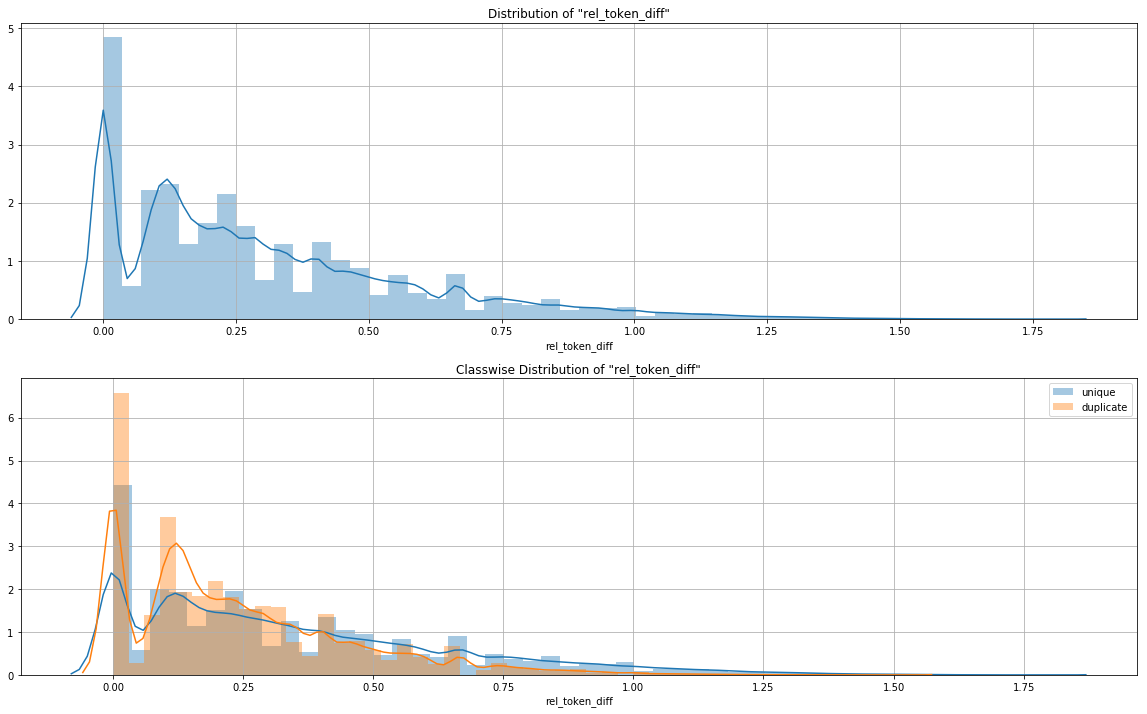

In [8]:
data['rel_token_diff'] = data[['abs_token_diff', 'avg_num_token']].progress_apply(
    lambda row: row['abs_token_diff']/row['avg_num_token'],
    axis=1
)

print(feature_distribution(data, 'rel_token_diff', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'rel_token_diff', 'is_duplicate', labels=['unique', 'duplicate'])

___
<center><b>token_intersection</b>:  number of unique tokens common to question1 and question2</center>


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  2.0   3.0   5.0   16.0  36   3.76  3.22
1        0    1.0  3.0   5.0   6.0   15.0  42   5.22  2.73
overall  0    0.0  2.0   4.0   6.0   16.0  42   4.30  3.12


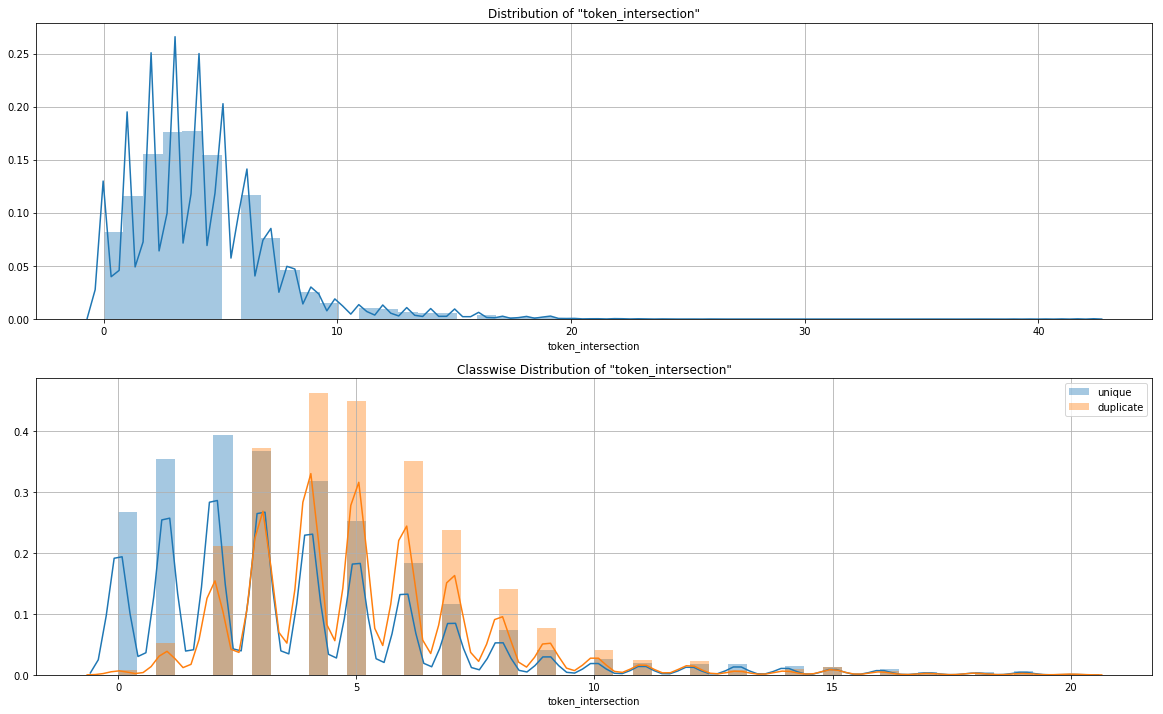

In [9]:
data['token_intersection'] = data[['question1', 'question2']].progress_apply(
    lambda row: len(set(row['question1'].split())&set(row['question2'].split())),
    axis=1
)

print(feature_distribution(data, 'token_intersection', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'token_intersection', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=20)

___
<center><b>token_union</b>: number of unique tokens in question1 and question2 combined</center>


         min  1st  25th  50th  75th  99th  max   mean   std
0        3    6.0  12.0  17.0  23.0  47.0  162  18.64  8.91
1        3    6.0  10.0  13.0  16.0  31.0  84   13.89  5.27
overall  3    6.0  11.0  15.0  20.0  44.0  162  16.89  8.10


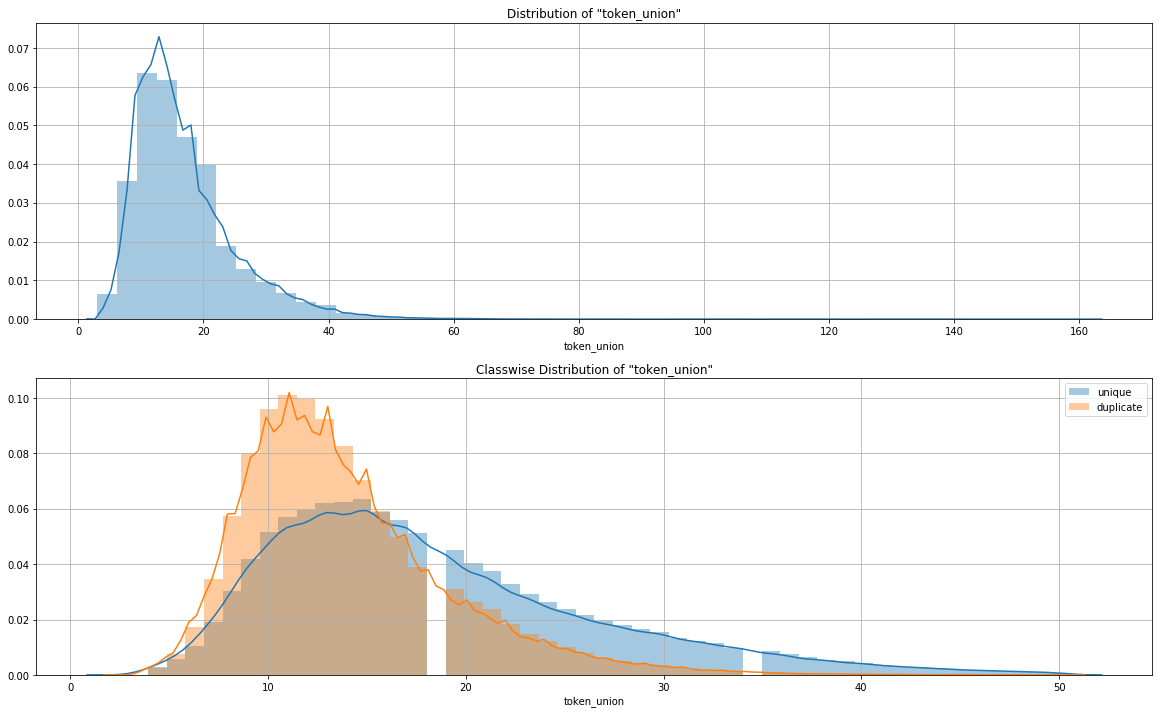

In [10]:
data['token_union'] = data[['question1', 'question2']].progress_apply(
    lambda row: len(set(row['question1'].split())|set(row['question2'].split())),
    axis=1
)

print(feature_distribution(data, 'token_union', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'token_union', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=50)

___
<center><b>jaccard_similarity_token</b>: token_intersection / token_union </center>


         min   1st  25th  50th  75th  99th  max  mean   std
0        0.0  0.00  0.08  0.17  0.36  0.88  1.0  0.25  0.23
1        0.0  0.08  0.25  0.37  0.54  0.90  1.0  0.41  0.20
overall  0.0  0.00  0.12  0.25  0.44  0.89  1.0  0.31  0.23


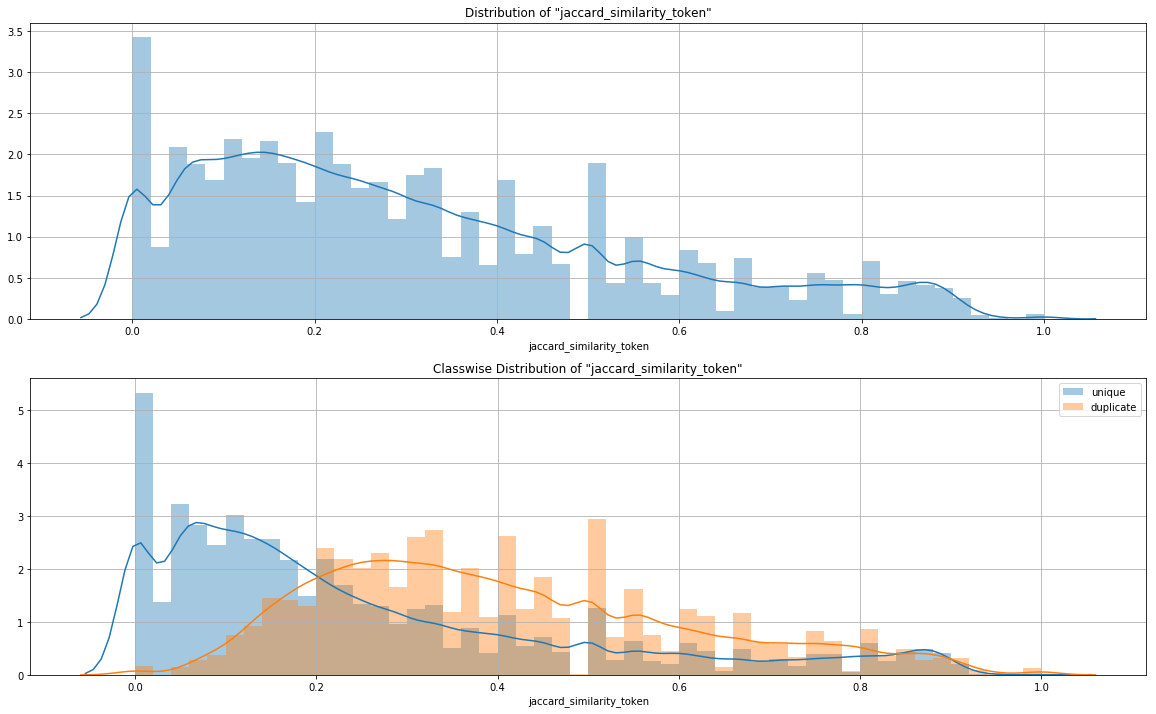

In [11]:
data['jaccard_similarity_token'] = data[['token_intersection', 'token_union']].progress_apply(
    lambda row: row['token_intersection']/row['token_union'],
    axis=1
)

print(feature_distribution(data, 'jaccard_similarity_token', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'jaccard_similarity_token', 'is_duplicate', labels=['unique', 'duplicate'])

<center><b>lcs_token</b>: length of longest common subsequence of tokens</center>

In [12]:
def lcs(X , Y): 
    m = len(X) 
    n = len(Y) 

    L = [[None]*(n+1) for i in range(m+1)] 
  
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j] , L[i][j-1]) 
  
    return L[m][n] 


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  1.0   3.0   5.0   17.0  48   3.58  3.32
1        0    1.0  3.0   5.0   6.0   18.0  52   5.10  2.95
overall  0    0.0  2.0   4.0   5.0   17.0  52   4.14  3.27


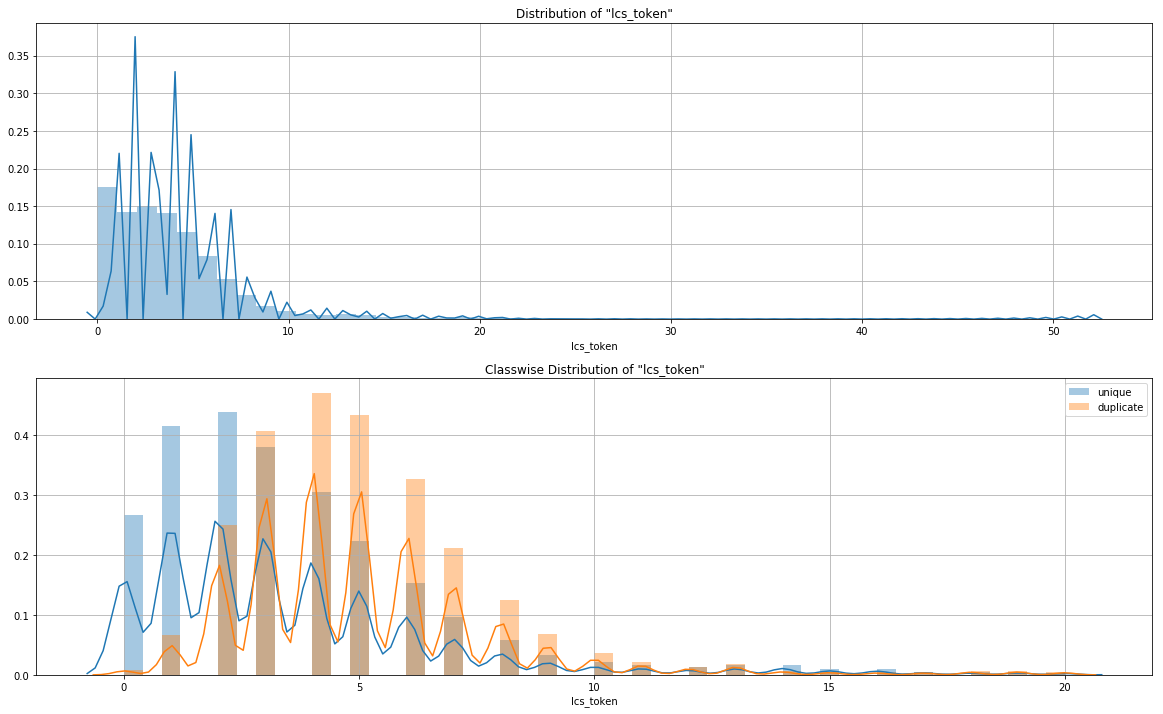

In [13]:
data['lcs_token'] = data[['question1', 'question2']].progress_apply(
    lambda row: lcs(row['question1'].split(), row['question2'].split()),
    axis=1
)

print(feature_distribution(data, 'lcs_token', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'lcs_token', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=20)

<center><b>lcs_token_ratio</b>: lcs_token / avg_num_tokens</center>


         min   1st  25th  50th  75th  99th  max  mean   std
0        0.0  0.00  0.12  0.25  0.50  0.94  1.0  0.33  0.27
1        0.0  0.12  0.36  0.50  0.67  0.95  1.0  0.53  0.21
overall  0.0  0.00  0.18  0.38  0.60  0.94  1.0  0.40  0.26


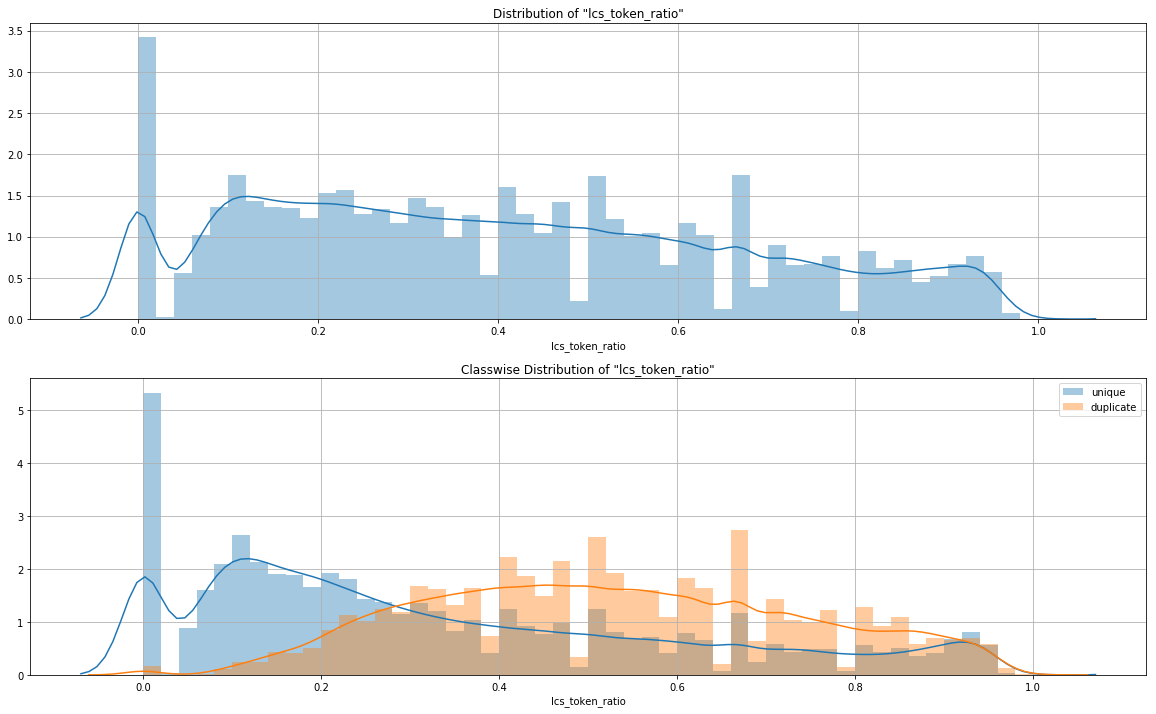

In [14]:
data['lcs_token_ratio'] = data[['lcs_token', 'avg_num_token']].progress_apply(
    lambda row: row['lcs_token']/row['avg_num_token'],
    axis=1
)

print(feature_distribution(data, 'lcs_token_ratio', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'lcs_token_ratio', 'is_duplicate', labels=['unique', 'duplicate'])

In [15]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,lcs_token,lcs_token_ratio
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231,11,0.846154
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000,4,0.380952
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857,3,0.250000
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000,0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111,2,0.200000


In [16]:
feats = ['abs_token_diff', 'avg_num_token', 'rel_token_diff', 
         'token_intersection', 'token_union', 'jaccard_similarity_token',
         'lcs_token', 'lcs_token_ratio'
]
pbc = []
for feat in feats:
    pbc.append(point_biserial_correlation('is_duplicate', feat, data))

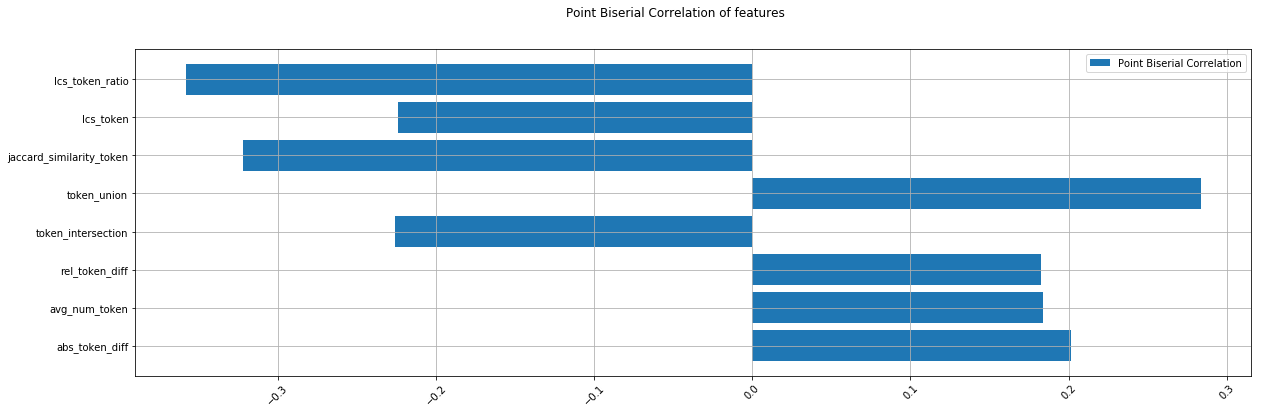

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))
fig.suptitle('Point Biserial Correlation of features')
plt.barh(y=feats, width=pbc)
ax.grid()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.legend(['Point Biserial Correlation'])

# Model Fitting

In [18]:
from sklearn.linear_model import LogisticRegression

Mean Loss 0.5549296231442001 +- 0.001991018274790771


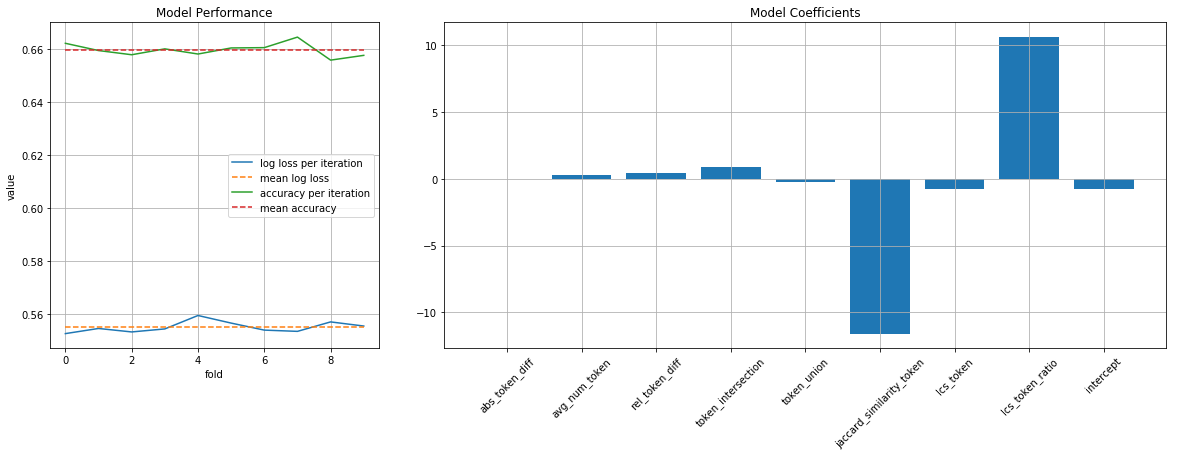

In [19]:
model = LogisticRegression()
lr_performance, lr_model = train_model(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(lr_performance['log loss']), '+-', np.std(lr_performance['log loss']))

In [20]:
data.to_csv('basic_features.csv', index=False)